# Import packages

In [51]:
import pandas as pd
import datetime
import plotly.express as px
import plotly.graph_objects as go
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import numpy as np
import seaborn as sns


# Load the data

In [52]:
df = pd.read_excel("happiness is in what.xlsx") # i made this dataset using 2022 end of year data from multiple sites
df.head()

,State,PercentHighSchoolOrHigherEducation,PercentBachelorsOrHigherEducation,Percent of Population Obese,Drug Overdose Mortality (Per 100k),Price of Pizza,Median Household Income,Percent Unemployment Rate,Percent of Religious Population,Percent of Married People,Percent Conservative,Percent Moderate,Percent Liberal,Percent Dont know political stance,Happy Score
0,Alabama,86.9,26.2,39.3,30.1,14.80,52035,2.3,77,48.0,0.50,0.29,0.12,0.08,39.32
1,Alaska,93.1,30.0,33.5,35.6,21.74,77790,3.7,41,49.2,0.34,0.37,0.23,0.06,46.27
2,Arizona,87.9,30.3,31.3,38.7,19.28,61529,3.5,51,47.2,0.39,0.31,0.23,0.07,50.22
3,Arkansas,87.2,23.8,38.7,22.3,16.46,49475,3.0,70,49.7,0.42,0.38,0.14,0.06,38.23
4,California,83.9,34.7,27.6,26.6,21.19,78672,4.4,47,46.8,0.31,0.34,0.29,0.06,59.97


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               50 non-null     object 
 1   PercentHighSchoolOrHigherEducation  50 non-null     float64
 2   PercentBachelorsOrHigherEducation   50 non-null     float64
 3   Percent of Population Obese         50 non-null     float64
 4   Drug Overdose Mortality (Per 100k)  50 non-null     float64
 5   Price of Pizza                      50 non-null     float64
 6   Median Household Income             50 non-null     int64  
 7   Percent Unemployment Rate           50 non-null     float64
 8   Percent of Religious Population     50 non-null     int64  
 9   Percent of Married People           50 non-null     float64
 10  Percent Conservative                50 non-null     float64
 11  Percent Moderate                    50 non-null

# Normalize za Data

In [54]:
cols = list(df.columns)
cols.remove('State')

In [55]:
for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0) #z score scale our data

In [56]:
df.columns

Index(['State', 'PercentHighSchoolOrHigherEducation',
       'PercentBachelorsOrHigherEducation', 'Percent of Population Obese ',
       'Drug Overdose Mortality (Per 100k)', 'Price of Pizza',
       'Median Household Income', 'Percent Unemployment Rate',
       'Percent of Religious Population', 'Percent of Married People',
       'Percent Conservative', 'Percent Moderate', 'Percent Liberal',
       'Percent Dont know political stance', 'Happy Score',
       'PercentHighSchoolOrHigherEducation_zscore',
       'PercentBachelorsOrHigherEducation_zscore',
       'Percent of Population Obese _zscore',
       'Drug Overdose Mortality (Per 100k)_zscore', 'Price of Pizza_zscore',
       'Median Household Income_zscore', 'Percent Unemployment Rate_zscore',
       'Percent of Religious Population_zscore',
       'Percent of Married People_zscore', 'Percent Conservative_zscore',
       'Percent Moderate_zscore', 'Percent Liberal_zscore',
       'Percent Dont know political stance_zscore', 'Happ

# EDA (Explaratory Data Analysusss)

C:\Users\VZeinali\AppData\Local\Temp\ipykernel_25088\377676744.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


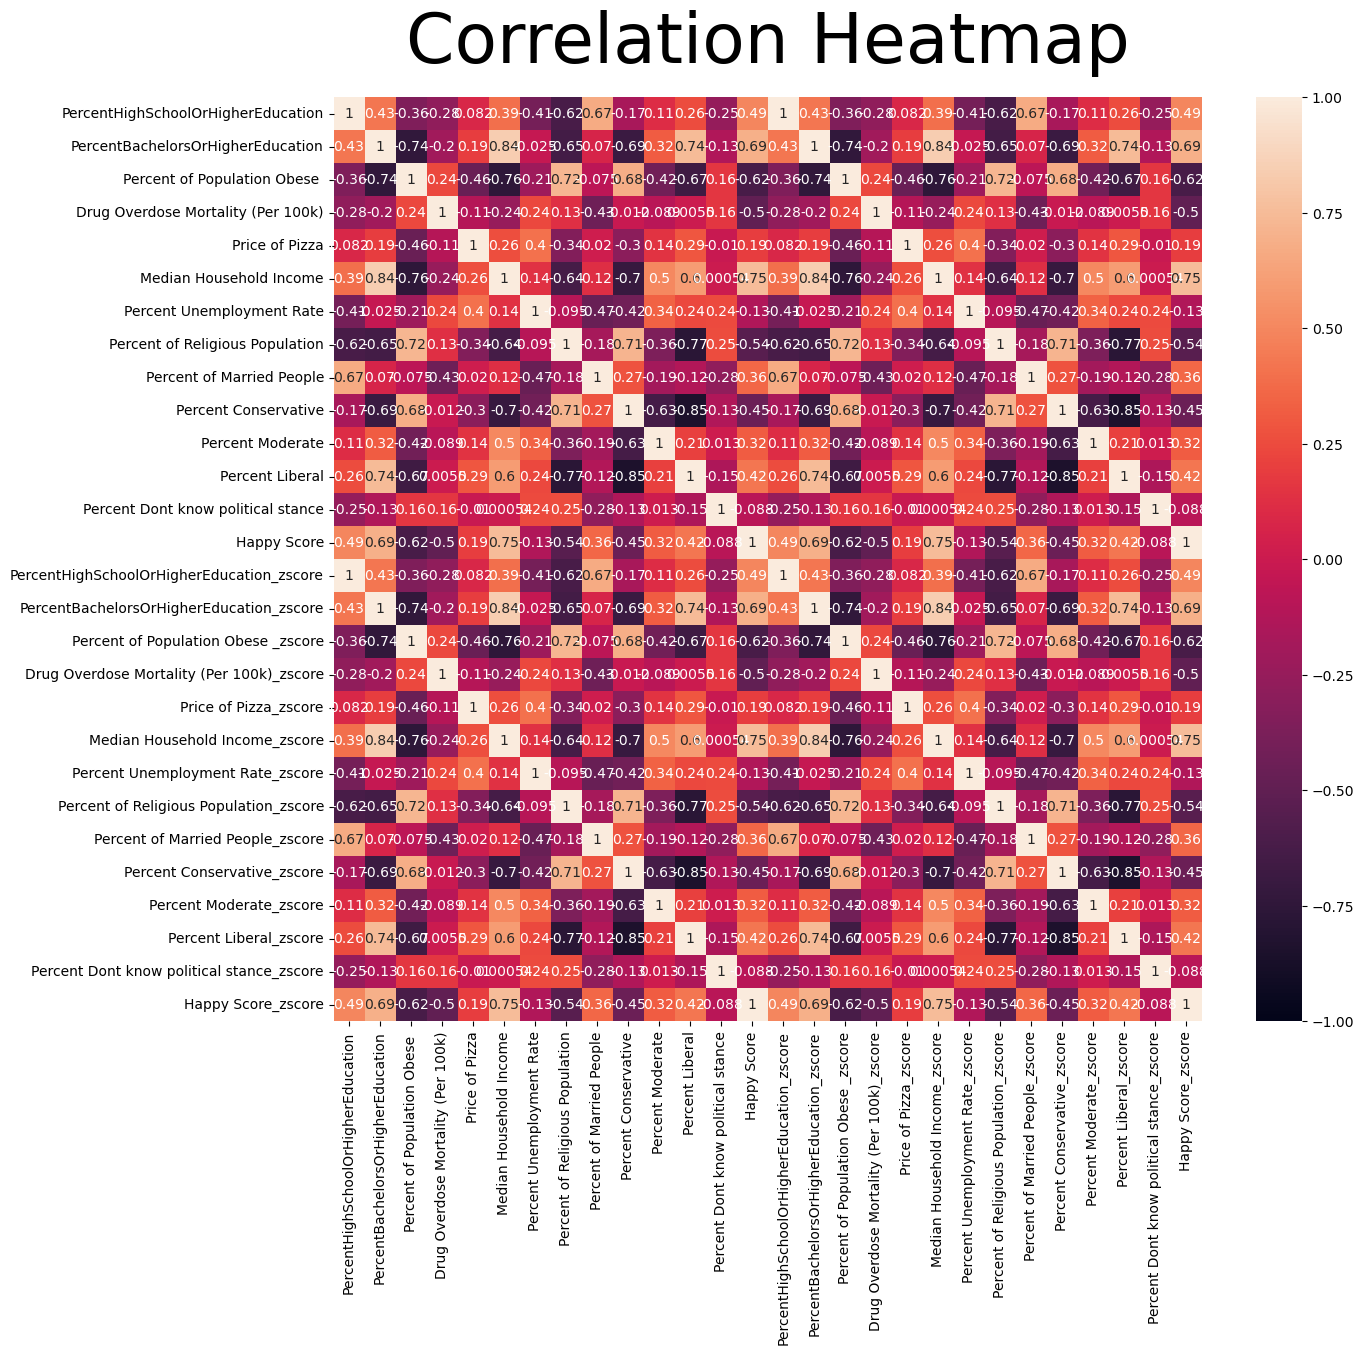

In [57]:
# Increase the size of the heatmap.
plt.figure(figsize=(14, 12))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':50}, pad=25);

In [58]:
y=df["Happy Score"]
x=df[['PercentHighSchoolOrHigherEducation_zscore',
       'PercentBachelorsOrHigherEducation_zscore',
       'Percent of Population Obese _zscore',
       'Drug Overdose Mortality (Per 100k)_zscore', 'Price of Pizza_zscore',
       'Median Household Income_zscore', 'Percent Unemployment Rate_zscore',
       'Percent of Religious Population_zscore',
       'Percent of Married People_zscore', 'Percent Conservative_zscore',
       'Percent Moderate_zscore', 'Percent Liberal_zscore',
       'Percent Dont know political stance_zscore']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 42)

# Lasso L1 Regularization



In [59]:
y = df["Happy Score"]

In [60]:
list_numerical = x
list_numerical

,PercentHighSchoolOrHigherEducation_zscore,PercentBachelorsOrHigherEducation_zscore,Percent of Population Obese _zscore,Drug Overdose Mortality (Per 100k)_zscore,Price of Pizza_zscore,Median Household Income_zscore,Percent Unemployment Rate_zscore,Percent of Religious Population_zscore,Percent of Married People_zscore,Percent Conservative_zscore,Percent Moderate_zscore,Percent Liberal_zscore,Percent Dont know political stance_zscore
0,-1.205556,-1.116318,1.451062,-0.254759,-1.206098,-1.199146,-1.312629,2.283427,-0.411438,1.929593,-1.432921,-2.089880,1.125
1,1.177878,-0.384937,-0.049680,0.130391,1.577329,1.272713,0.539871,-1.099428,0.041521,-0.512930,1.245436,-0.018828,-0.125
2,-0.821131,-0.327197,-0.618927,0.347475,0.590696,-0.287951,0.275229,-0.159746,-0.713411,0.250359,-0.763332,-0.018828,0.500
3,-1.090229,-1.578243,1.295813,-0.800970,-0.540322,-1.444844,-0.386379,1.625650,0.230254,0.708332,1.580231,-1.713325,-0.125
4,-2.358831,0.519665,-1.576296,-0.499854,1.356740,1.357364,1.466122,-0.535619,-0.864397,-0.970903,0.241052,1.110837,-0.125
5,0.793453,1.847699,-2.223168,-0.163723,1.372783,1.027111,-0.651022,-0.535619,0.268001,-0.665588,0.241052,0.922560,-0.750
6,0.332143,1.539749,-0.851800,0.599572,0.137487,1.470904,0.936836,-1.005460,-0.486931,-0.665588,0.910642,0.357727,-0.125
7,0.216816,0.134728,0.053820,1.418890,-0.845135,0.439643,1.466122,-0.629587,-0.486931,-1.734191,2.249821,0.357727,1.750
8,-0.590477,-0.288703,0.881815,0.263442,0.161551,-0.655155,-0.915664,0.028190,-0.977637,-0.054957,-0.763332,0.169450,1.125
9,-0.821131,0.038494,0.053820,-0.716938,-0.079091,-0.317223,-0.254057,1.061841,-0.864397,0.708332,-0.428537,-0.583660,-0.125


In [61]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(x_train, y_train)

Lasso(alpha=1)

In [62]:
print('R squared training set', round(reg.score(x_train, y_train)*100, 6))
print('R squared test set', round(reg.score(x_test, y_test)*100, 6))

R squared training set 66.27747
R squared test set 60.952127


In [63]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(x_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(x_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 19.87
MSE test set 20.6


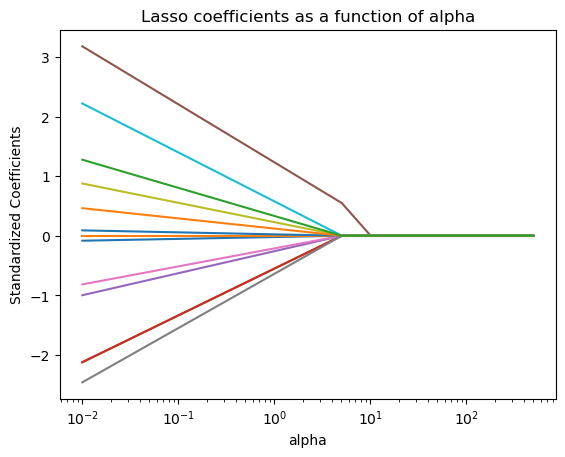

In [64]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [65]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(x_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [66]:
model.alpha_

0.522025031999353

In [67]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(x_train, y_train)

Lasso(alpha=0.522025031999353)

In [68]:
list(zip(lasso_best.coef_, x))

[(0.9619648609035758, 'PercentHighSchoolOrHigherEducation_zscore'),
 (0.02079580312540687, 'PercentBachelorsOrHigherEducation_zscore'),
 (-1.1093600051165144, 'Percent of Population Obese _zscore'),
 (-1.6782909991583896, 'Drug Overdose Mortality (Per 100k)_zscore'),
 (-0.0, 'Price of Pizza_zscore'),
 (3.259882048631646, 'Median Household Income_zscore'),
 (-0.5252754788499188, 'Percent Unemployment Rate_zscore'),
 (-0.06431210958918034, 'Percent of Religious Population_zscore'),
 (0.3848378628032346, 'Percent of Married People_zscore'),
 (-0.0, 'Percent Conservative_zscore'),
 (-0.0, 'Percent Moderate_zscore'),
 (0.0, 'Percent Liberal_zscore'),
 (0.0, 'Percent Dont know political stance_zscore')]

In [69]:
print('R squared training set', round(lasso_best.score(x_train, y_train)*100, 6))
print('R squared test set', round(lasso_best.score(x_test, y_test)*100, 6))

R squared training set 69.856011
R squared test set 62.214006


In [70]:
mean_squared_error(y_test, lasso_best.predict(x_test))

19.9304984380529

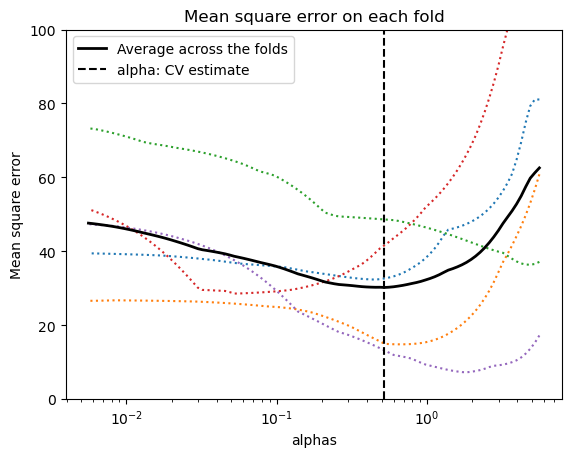

In [71]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 0, 100
plt.ylim(ymin, ymax);


# Ridge L2 Regularization

In [74]:
y=df["Happy Score"]
x=df[['PercentHighSchoolOrHigherEducation_zscore',
       'PercentBachelorsOrHigherEducation_zscore',
       'Percent of Population Obese _zscore',
       'Drug Overdose Mortality (Per 100k)_zscore', 'Price of Pizza_zscore',
       'Median Household Income_zscore', 'Percent Unemployment Rate_zscore',
       'Percent of Religious Population_zscore',
       'Percent of Married People_zscore', 'Percent Conservative_zscore',
       'Percent Moderate_zscore', 'Percent Liberal_zscore',
       'Percent Dont know political stance_zscore']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 42)

In [75]:
mlr = Ridge() # don't need to normalize for linear regression
mlr.fit(x_train, y_train)
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  50.60906013726141
Coefficients:


[('PercentHighSchoolOrHigherEducation_zscore', 0.14634488355047257),
 ('PercentBachelorsOrHigherEducation_zscore', 0.2873982202200344),
 ('Percent of Population Obese _zscore', -2.015439470801892),
 ('Drug Overdose Mortality (Per 100k)_zscore', -2.0783003258318495),
 ('Price of Pizza_zscore', -0.9328056672307928),
 ('Median Household Income_zscore', 2.8570343510104124),
 ('Percent Unemployment Rate_zscore', -0.7370293214402073),
 ('Percent of Religious Population_zscore', -2.05073325723791),
 ('Percent of Married People_zscore', 0.9399477277068853),
 ('Percent Conservative_zscore', 1.030617021919579),
 ('Percent Moderate_zscore', -0.24096809158994592),
 ('Percent Liberal_zscore', -0.24689158708193357),
 ('Percent Dont know political stance_zscore', 0.9574789856417454)]

In [76]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [47.58906644 42.61808567 39.65855123 52.96303637 37.7779591  52.30524821
 56.8804545  56.47451535 44.16874496 56.18509114 48.17783305 54.99413733
 49.78028352]


In [77]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head(30)

,Actual value,Predicted value
13,47.41,47.589066
39,49.62,42.618086
30,43.64,39.658551
45,57.84,52.963036
17,34.81,37.777959
48,53.61,52.305248
26,58.19,56.880454
25,51.34,56.474515
32,53.65,44.168745
19,62.60,56.185091


In [79]:
#Model Evaluation ***********BEST MODEL****************
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 66.48
Mean Absolute Error: 4.625390377990238
Mean Square Error: 30.451499322212776
Root Mean Square Error: 5.5182877165125035
